In [1]:
!pip install pandas numpy matplotlib pmdarima tensorflow scikit-learn


  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached h5py-3.12.1-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cac

In [2]:
!pip install yfinance

In [5]:
import pandas as pd
import yfinance as yf

tsla_data = yf.download('TSLA', start='2010-01-01', end='2024-12-31')
tsla_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


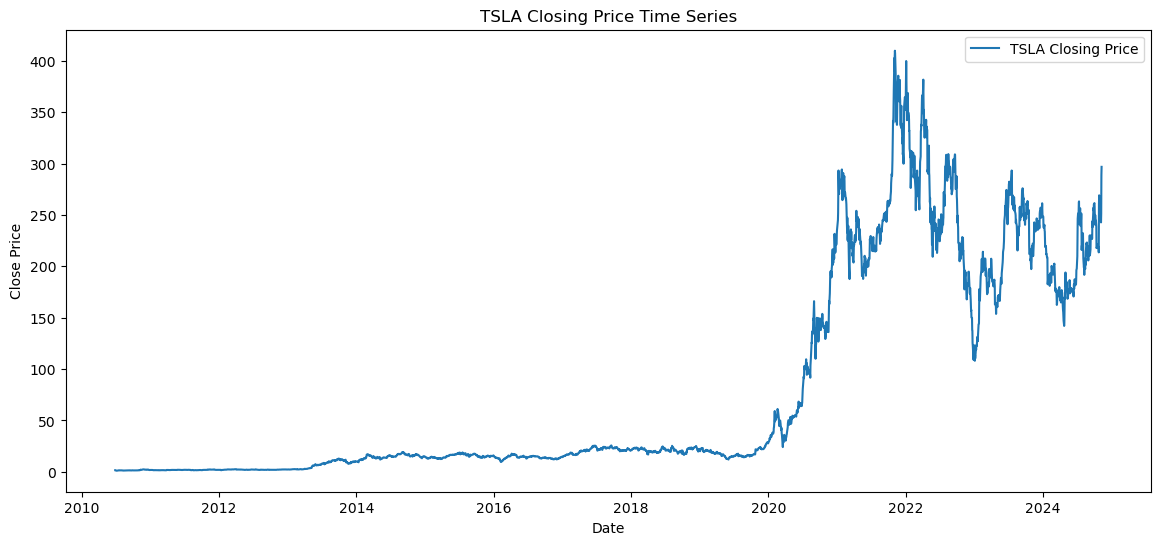

In [6]:
tsla_data.index = pd.to_datetime(tsla_data.index)

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(tsla_data['Close'], label='TSLA Closing Price')
plt.title('TSLA Closing Price Time Series')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


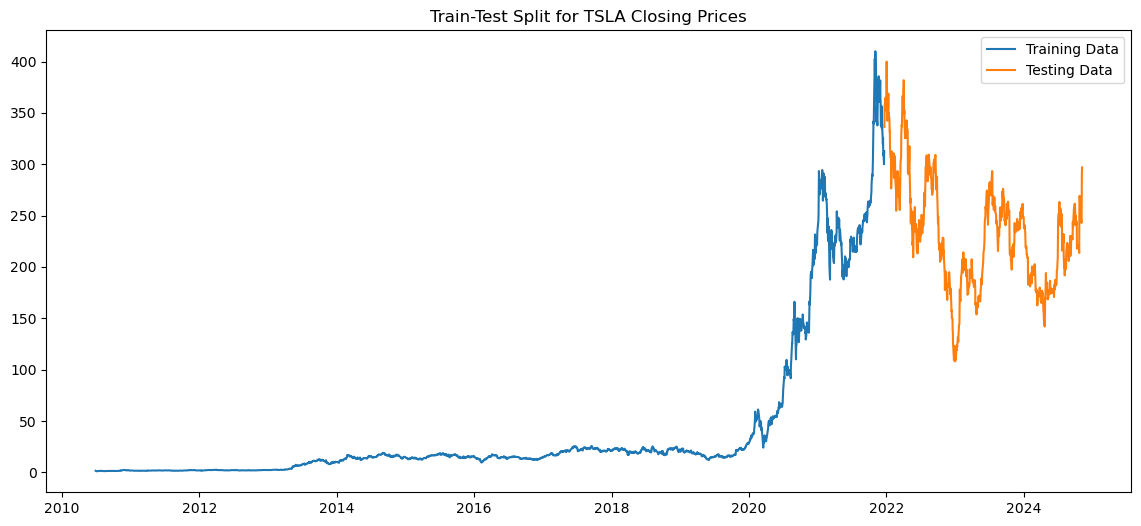

In [7]:
train_data = tsla_data[:int(0.8 * len(tsla_data))]
test_data = tsla_data[int(0.8 * len(tsla_data)):]

plt.figure(figsize=(14, 6))
plt.plot(train_data['Close'], label='Training Data')
plt.plot(test_data['Close'], label='Testing Data')
plt.legend()
plt.title('Train-Test Split for TSLA Closing Prices')
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.62 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=16948.484, Time=0.32 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=16020.750, Time=1.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=16946.487, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=15571.024, Time=1.43 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=15394.770, Time=2.44 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=15284.671, Time=2.05 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=15250.789, Time=3.15 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=20.31 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=17.62 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=15248.789, Time=1.26 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=15282.671, Time=0.94 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=7.10 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf,

C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA Model Evaluation:
MAE: 126.99397647789657, RMSE: 159.895387162968, MAPE: nan%


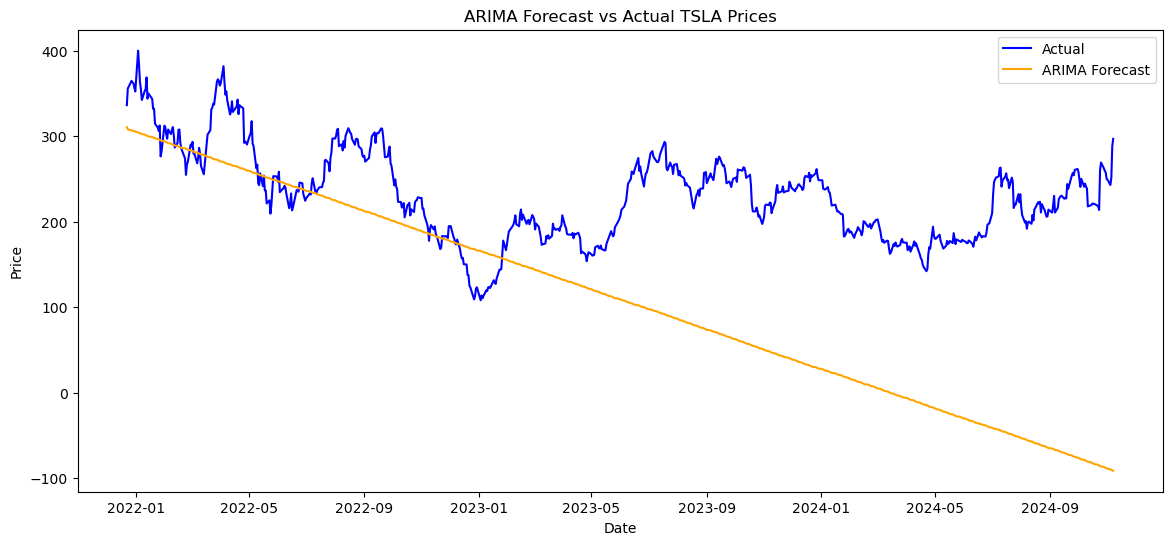

In [8]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

arima_model = auto_arima(train_data['Close'], seasonal=False, stepwise=True, trace=True)

forecast_arima = arima_model.predict(n_periods=len(test_data))

mae_arima = mean_absolute_error(test_data['Close'], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test_data['Close'], forecast_arima))
mape_arima = np.mean(np.abs((test_data['Close'] - forecast_arima) / test_data['Close'])) * 100

print(f"ARIMA Model Evaluation:")
print(f"MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")

plt.figure(figsize=(14, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual', color='blue')
plt.plot(test_data.index, forecast_arima, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast vs Actual TSLA Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[5]             : AIC=inf, Time=14.98 sec
 ARIMA(0,2,0)(0,0,0)[5]             : AIC=16946.487, Time=0.22 sec
 ARIMA(1,2,0)(1,0,0)[5]             : AIC=16020.618, Time=0.97 sec
 ARIMA(0,2,1)(0,0,1)[5]             : AIC=inf, Time=3.26 sec
 ARIMA(1,2,0)(0,0,0)[5]             : AIC=16018.751, Time=0.41 sec
 ARIMA(1,2,0)(0,0,1)[5]             : AIC=16020.612, Time=0.83 sec
 ARIMA(1,2,0)(1,0,1)[5]             : AIC=16020.352, Time=3.40 sec
 ARIMA(2,2,0)(0,0,0)[5]             : AIC=15569.025, Time=0.52 sec
 ARIMA(2,2,0)(1,0,0)[5]             : AIC=15570.811, Time=1.21 sec
 ARIMA(2,2,0)(0,0,1)[5]             : AIC=15570.804, Time=0.87 sec
 ARIMA(2,2,0)(1,0,1)[5]             : AIC=15572.416, Time=3.99 sec
 ARIMA(3,2,0)(0,0,0)[5]             : AIC=15392.770, Time=0.99 sec
 ARIMA(3,2,0)(1,0,0)[5]             : AIC=15394.467, Time=1.66 sec
 ARIMA(3,2,0)(0,0,1)[5]             : AIC=15394.468, Time=1.60 sec
 ARIMA(3,2,0)(1,0,1)[5]       

C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


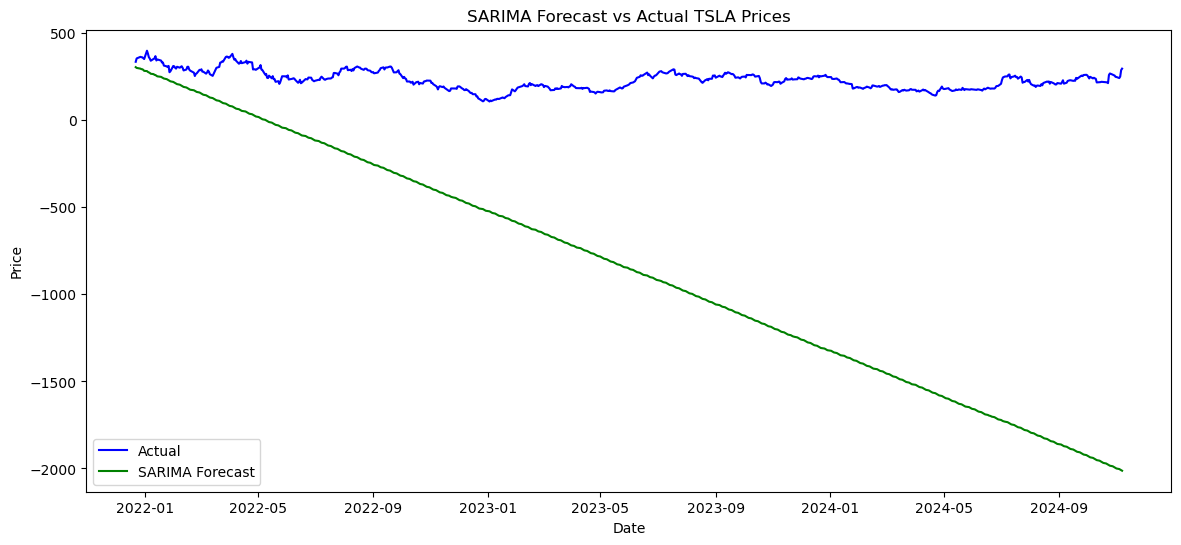

In [9]:
sarima_model = auto_arima(train_data['Close'], seasonal=True, m=5, stepwise=True, trace=True)

forecast_sarima = sarima_model.predict(n_periods=len(test_data))

mae_sarima = mean_absolute_error(test_data['Close'], forecast_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test_data['Close'], forecast_sarima))
mape_sarima = np.mean(np.abs((test_data['Close'] - forecast_sarima) / test_data['Close'])) * 100

print(f"SARIMA Model Evaluation:")
print(f"MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}%")

plt.figure(figsize=(14, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual', color='blue')
plt.plot(test_data.index, forecast_sarima, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast vs Actual TSLA Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


C:\Users\nejat\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 31s 135ms/step - loss: 0.0091
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - loss: 4.1011e-04
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - loss: 3.8532e-04
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - loss: 3.3197e-04
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - loss: 2.8372e-04
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 2.4015e-04
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - loss: 3.5569e-04
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - loss: 2.2200e-04
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - loss: 2.5165e-04
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - loss: 2.5269e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step
LSTM Model Evaluation:
MAE: 46.017085799251696, RMSE: 57.49423930708397, MAPE: 21.438350362054813%


ValueError: x and y must have same first dimension, but have shapes (724,) and (664, 1)

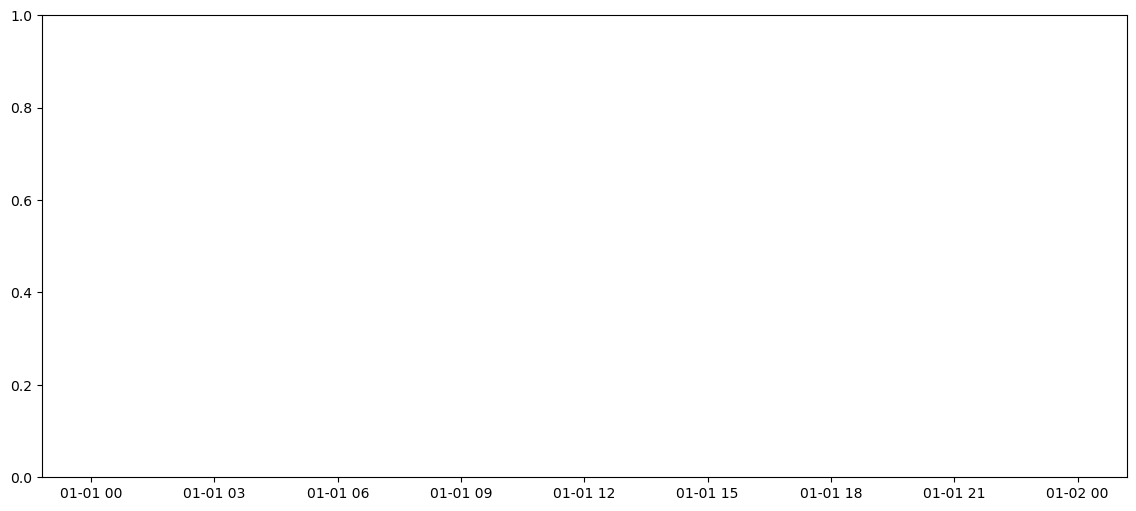

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train_data['Close'].values.reshape(-1, 1))

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(scaled_data)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=1))  # Output layer

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)


scaled_test_data = scaler.transform(test_data['Close'].values.reshape(-1, 1))
X_test, y_test = create_dataset(scaled_test_data)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

mae_lstm = mean_absolute_error(test_data['Close'][:len(lstm_predictions)], lstm_predictions)
rmse_lstm = np.sqrt(mean_squared_error(test_data['Close'][:len(lstm_predictions)], lstm_predictions))
mape_lstm = np.mean(np.abs((test_data['Close'][:len(lstm_predictions)] - lstm_predictions) / test_data['Close'][:len(lstm_predictions)])) * 100

print(f"LSTM Model Evaluation:")
print(f"MAE: {mae_lstm}, RMSE: {rmse_lstm}, MAPE: {mape_lstm}%")

plt.figure(figsize=(14, 6))
plt.plot(test_data.index, test_data['Close'][:len(lstm_predictions)], label='Actual', color='blue')
plt.plot(test_data.index, lstm_predictions, label='LSTM Forecast', color='red')
plt.title('LSTM Forecast vs Actual TSLA Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [11]:
print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")
print(f"SARIMA MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}%")
print(f"LSTM MAE: {mae_lstm}, RMSE: {rmse_lstm}, MAPE: {mape_lstm}%")


SyntaxError: invalid syntax (4165089992.py, line 4)